# Predicting Pleasant Weather with Random Forests

For this project, I’m using a random forest model to identify which weather features and stations are the best predictors of a “pleasant day.” The dataset, provided by ClimateWins, contains decades of weather observations from multiple stations. The aim is to pinpoint the most useful variables so ClimateWins can improve climate forecasts and guide smarter investments.

## Table of Contents  
- [1. Load Libraries & Dataset](#1-load-libraries-datasets)  
- [2. Clean & Wrangle ](#2-clean-wrangle)  
- [3. Shaping Data](#3-shape-data)  
- [4. Splitting Data](#4-splitting-data)  
- [5. Training a Random Forest Classifier](#5-training-a-random-forest-classifier)  
- [6. Feature Importance Analysis](#6-feature-importance-analysis)  
- [7. Insights](#7-insights)

## 1. Load Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score

In [3]:
# Define directory path
path = r'C:\Users\Olufemi\Downloads\CareerFoundry Data Analyics\Machine Learning Specialization Course\Achievement 2\Data Sets'

In [5]:
# Import the cleaned weather dataset
climate = pd.read_csv(os.path.join(path, 'Unsupervised', 'Cleaned Datasets', 'weather_cleaned.csv'))

In [7]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,1,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,1,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4


In [9]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Columns: 137 entries, DATE to VALENTIA_temp_max
dtypes: float64(120), int64(17)
memory usage: 24.0 MB


In [11]:
climate.shape

(22950, 137)

In [13]:
# Import the 'Pleasant weather' dataset
pleasantweather = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [15]:
pleasantweather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
pleasantweather.shape

(22950, 16)

## 2. Clean & Wrangle

In [19]:
climate.isnull().sum()

DATE                      0
MONTH                     0
BASEL_cloud_cover         0
BASEL_humidity            0
BASEL_pressure            0
                         ..
VALENTIA_precipitation    0
VALENTIA_sunshine         0
VALENTIA_temp_mean        0
VALENTIA_temp_min         0
VALENTIA_temp_max         0
Length: 137, dtype: int64

In [21]:
pleasantweather.isnull().sum()

DATE                           0
BASEL_pleasant_weather         0
BELGRADE_pleasant_weather      0
BUDAPEST_pleasant_weather      0
DEBILT_pleasant_weather        0
DUSSELDORF_pleasant_weather    0
HEATHROW_pleasant_weather      0
KASSEL_pleasant_weather        0
LJUBLJANA_pleasant_weather     0
MAASTRICHT_pleasant_weather    0
MADRID_pleasant_weather        0
MUNCHENB_pleasant_weather      0
OSLO_pleasant_weather          0
SONNBLICK_pleasant_weather     0
STOCKHOLM_pleasant_weather     0
VALENTIA_pleasant_weather      0
dtype: int64

In [23]:
# Step 1: Filter the main climate data to include only the years from 2010 to 2019. 
#This limits the dataset to a single decade to accelerate training and enhance consistency.
climate_decade = climate[
    (climate['DATE'].astype(str).str[:4] >='2010') &
    (climate['DATE'].astype(str).str[:4] <='2019')
]

# Preview the filtered data
climate_decade

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,20100101,1,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,...,-7.0,1,0.80,1.0121,0.43,0.00,6.0,1.7,-1.6,5.0
18264,20100102,1,3,0.74,1.0193,0.58,0.00,5.2,-1.5,-4.2,...,-7.1,1,0.82,1.0196,0.45,0.00,6.0,0.8,-4.5,6.2
18265,20100103,1,3,0.75,1.0226,0.61,0.00,6.3,-3.2,-6.0,...,-7.1,4,0.71,1.0196,0.36,0.41,1.6,0.5,-4.1,5.1
18266,20100104,1,5,0.83,1.0169,0.48,0.00,3.7,-4.9,-8.3,...,-3.6,2,0.67,1.0219,0.48,0.51,6.5,3.7,1.3,3.8
18267,20100105,1,7,0.78,1.0073,0.53,0.04,4.4,-4.0,-7.1,...,-5.5,4,0.78,1.0117,0.45,0.09,4.7,2.3,-0.7,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,12,8,0.92,1.0273,0.15,0.52,0.1,6.8,5.6,...,0.2,5,0.82,1.0142,0.04,0.41,3.4,10.7,7.9,13.5
21911,20191228,12,7,0.86,1.0380,0.35,0.00,1.3,3.7,-0.6,...,-1.0,5,0.82,1.0142,0.20,0.41,3.4,10.7,7.9,13.5
21912,20191229,12,6,0.93,1.0387,0.61,0.00,4.9,-0.8,-2.7,...,5.8,5,0.82,1.0142,0.24,0.41,3.4,10.7,7.9,13.5
21913,20191230,12,1,0.81,1.0354,0.64,0.00,6.5,0.5,-3.0,...,9.6,5,0.82,1.0142,0.06,0.41,3.4,10.7,7.9,13.5


In [25]:
# Step 2: Similarly, filter the answers dataset (pleasant weather labels) for the same time period
# This ensures your features (X) and labels (y) match in time
pleasantweather_decade = pleasantweather[
    (pleasantweather['DATE'].astype(str).str[:4] >= '2010') &
    (pleasantweather['DATE'].astype(str).str[:4] <= '2019')
]

# Preview the filtered labels
pleasantweather_decade

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,20100101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,20100102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,20100103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,20100104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,20100105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21911,20191228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21912,20191229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21913,20191230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# Set display options to show all rows if needed
pd.set_option('display.max_rows', None)

# Step 1: Extract station prefixes from column names
# Assuming format is 'STATION_VARIABLE' (e.g., 'BASEL_humidity')
stations = [col.split('_')[0] for col in climate_decade.columns if '_' in col]

# Step 2: Get unique station names
unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [29]:
# Step 3: Create a dictionary to store the number of valid (non-missing) entries per station
station_frequencies = {}

for station in unique_stations:
    # Select all columns that belong to the current station
    station_columns = [col for col in climate_decade.columns if col.startswith(station)]
    
    # Count rows where all station-specific columns have non-null values
    # This is a slightly more precise method than summing over all values
    complete_entries = climate_decade[station_columns].dropna().shape[0]
    
    # Store the count in the dictionary
    station_frequencies[station] = complete_entries

# Step 4: Print the frequency of valid entries for each weather station
print("Frequency of complete entries per weather station (rows without missing data):")
for station, freq in sorted(station_frequencies.items()):
    print(f"{station}: {freq} entries")

Frequency of complete entries per weather station (rows without missing data):
BASEL: 3652 entries
BELGRADE: 3652 entries
BUDAPEST: 3652 entries
DEBILT: 3652 entries
DUSSELDORF: 3652 entries
HEATHROW: 3652 entries
KASSEL: 3652 entries
LJUBLJANA: 3652 entries
MAASTRICHT: 3652 entries
MADRID: 3652 entries
MUNCHENB: 3652 entries
OSLO: 3652 entries
SONNBLICK: 3652 entries
STOCKHOLM: 3652 entries
VALENTIA: 3652 entries


In [31]:
# drop DATE and MONTH for your random forest
X = climate_decade.drop(columns=['DATE', 'MONTH'])  # Feature matrix
y = pleasantweather_decade['BASEL_pleasant_weather']  # Example target variable

In [33]:
X.shape

(3652, 135)

In [35]:
y.shape

(3652,)

In [37]:
X = climate_decade.drop(columns=['DATE', 'MONTH'])
y = pleasantweather_decade['BASEL_pleasant_weather']
X.shape

(3652, 135)

In [39]:
climate.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min',
       ...
       'STOCKHOLM_temp_max', 'VALENTIA_cloud_cover', 'VALENTIA_humidity',
       'VALENTIA_pressure', 'VALENTIA_global_radiation',
       'VALENTIA_precipitation', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=137)

## 3. Shaping Data

In [42]:
# We're going to use scikit-learn's machine learning tools (Random Forest).
# These tools expect the data to be in a clean, fast format - "NumPy arrays".

# While scikit-learn can usually handle DataFrames, converting to arrays helps because:
# - It strips away extra labels (column names and indexes) that the model doesn’t need
# - It runs a bit faster (especially on large datasets)
# - It avoids issues with mixed data types or hidden formatting

# Conversion step:
X = np.array(X)  # X contains the weather features (like temperature, humidity, etc.)
y = np.array(y)  # y contains whether the day was 'pleasant' (1) or not (0)

# Check:
print("Feature matrix shape (X):", X.shape)  # Should print (3652, 135)
print("Target variable shape (y):", y.shape)  # Should print (3652,)

Feature matrix shape (X): (3652, 135)
Target variable shape (y): (3652,)


##### Now the data is in the perfect format to be used in a machine learning model!

##### **Next Step:**
##### - Train a Random Forest model to learn from this data
##### - Plot one or two of the trees to visually explain decisions
##### - Identify which weather features or stations are most influential

## 4. Splitting Data

In [46]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [48]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739,)
(913, 135) (913,)


## 5. Training a Random Forest Classifier

In [51]:
# Initialize the Random Forest model
# This creates 100 decision trees and uses them together to make predictions
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Check how accurate the model is
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy on Test Set:", round(accuracy * 100, 2), "%")

Random Forest Accuracy on Test Set: 98.69 %


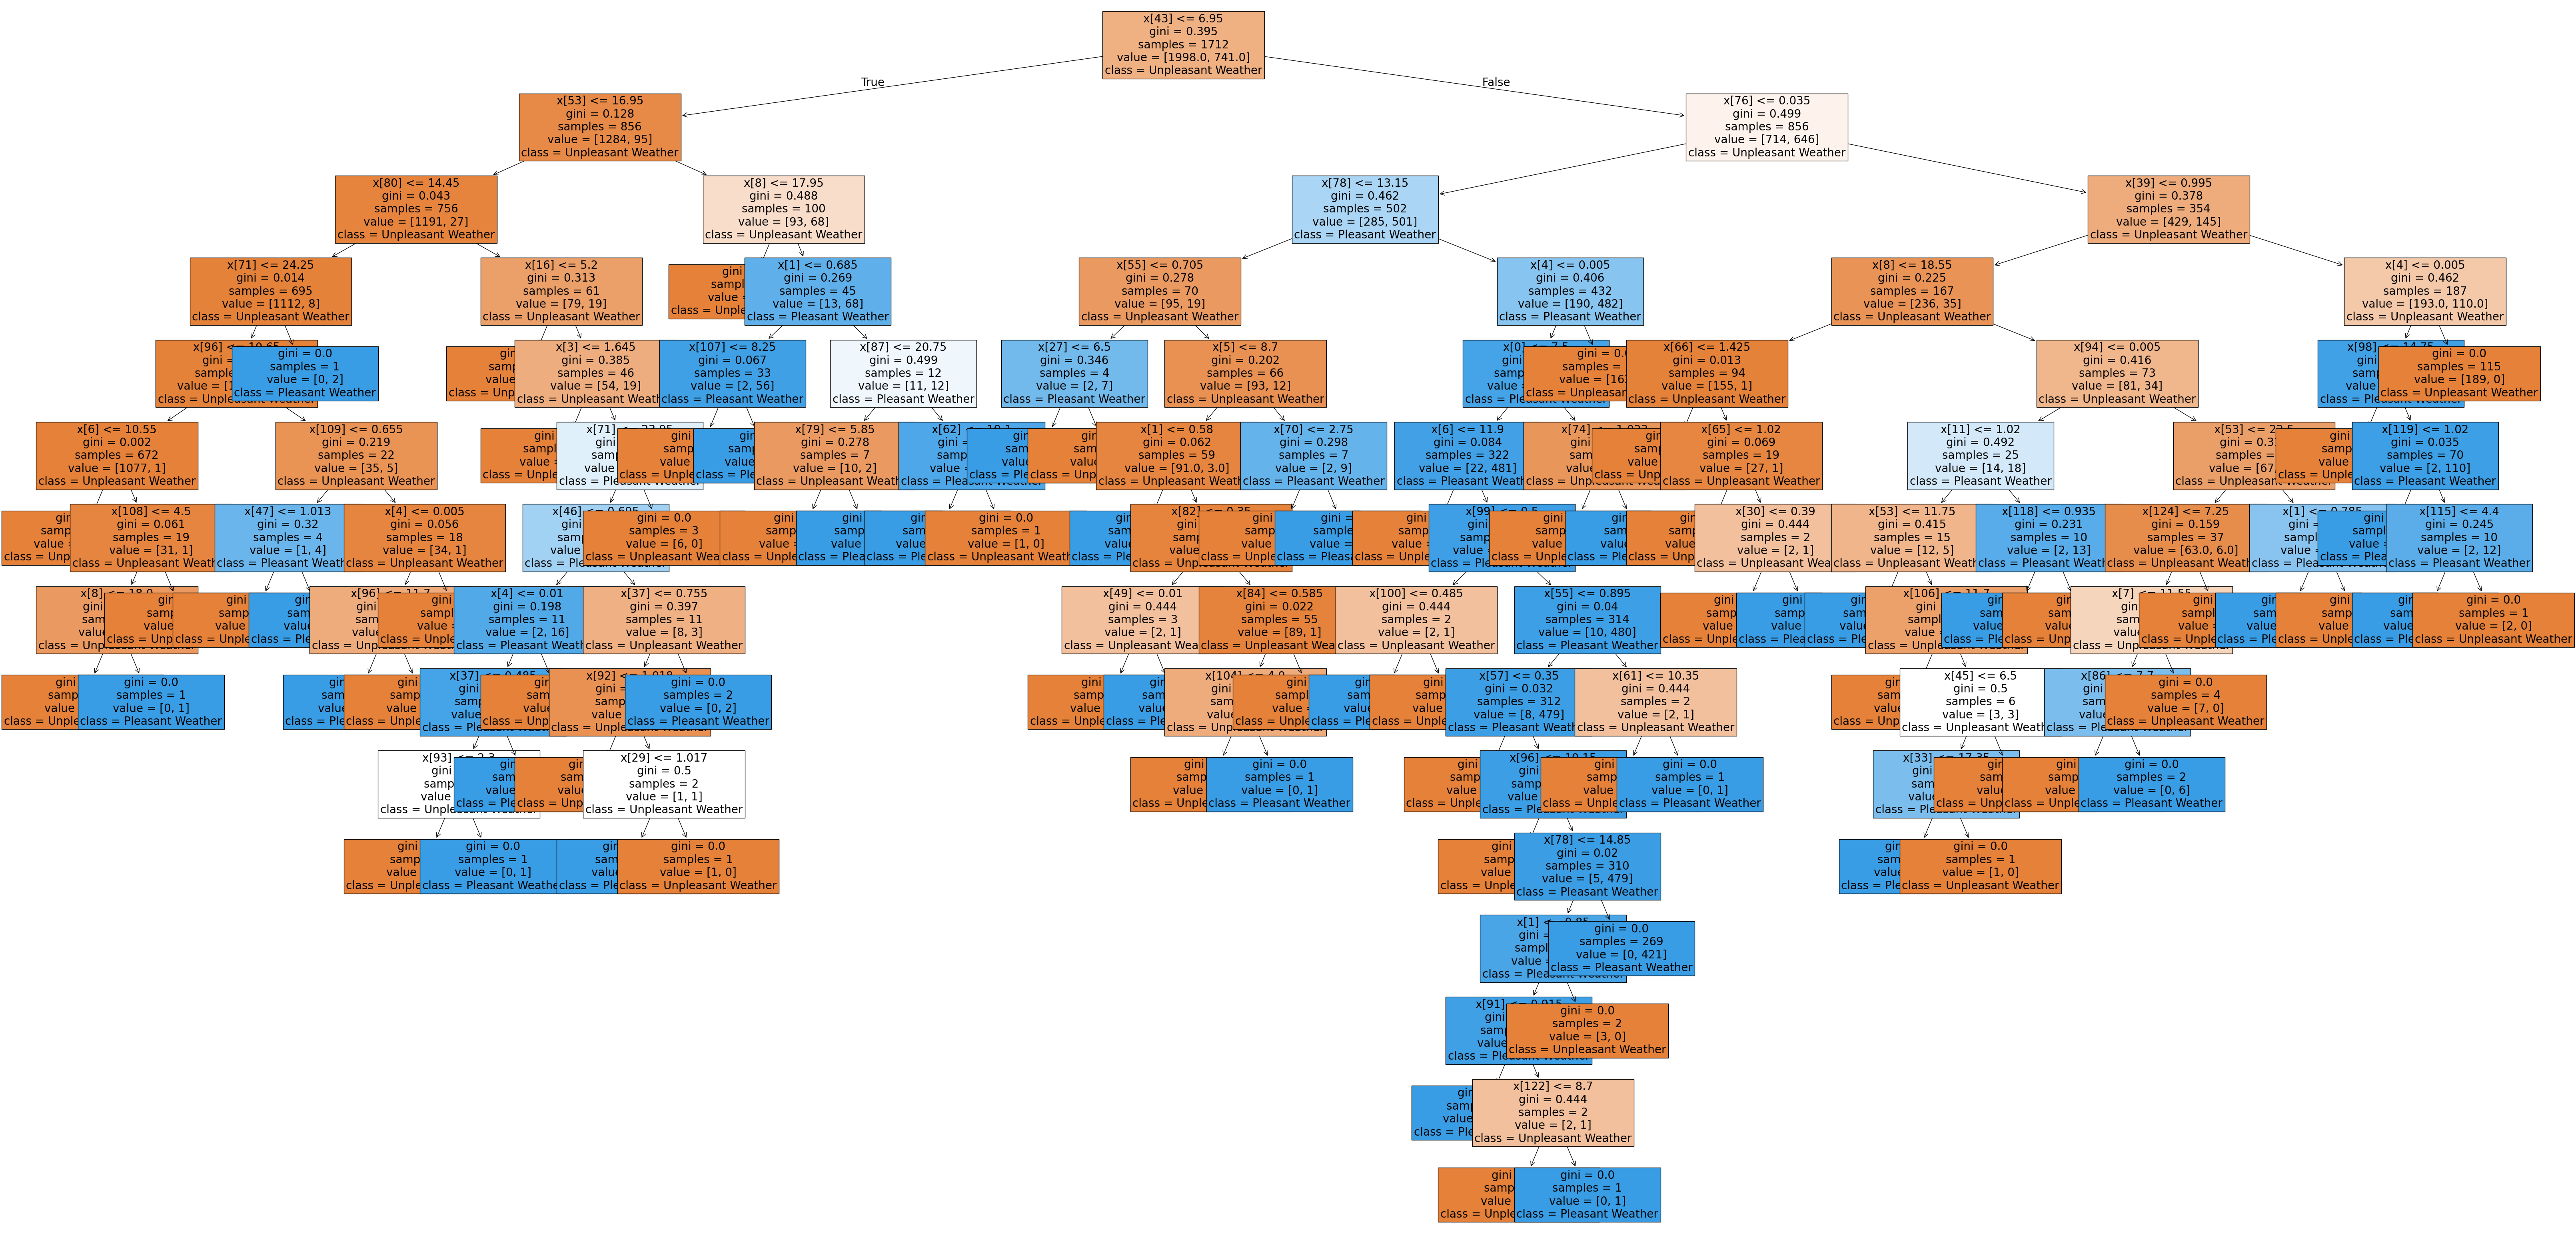

In [53]:
# Define class names for readability
class_names = ['Unpleasant Weather', 'Pleasant Weather']

# Plot the tree
fig = plt.figure(figsize=(80, 40))
plot_tree(clf.estimators_[15], 
          filled=True, 
          fontsize=20,
          feature_names=None,  # You can add your feature names here if you'd like
          class_names=class_names);  # Adds class labels at the leaves

## 6. Feature Importance Analysis

In [56]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape) # Should print: (135,)
newarray # This shows the raw importance values

(135,)


array([2.82346203e-02, 2.08947861e-02, 1.01907601e-02, 1.27029416e-02,
       1.59932594e-01, 6.14581152e-02, 3.24847684e-02, 3.79302155e-03,
       7.55948794e-02, 1.31072952e-03, 1.71182441e-03, 2.69401259e-03,
       1.87113135e-03, 1.15782019e-03, 1.19947017e-03, 3.07146770e-03,
       2.17307124e-03, 4.44628996e-03, 2.40940392e-04, 0.00000000e+00,
       0.00000000e+00, 1.13954099e-03, 7.52941429e-04, 8.88458935e-04,
       1.12737014e-02, 2.11516851e-03, 1.19133347e-02, 1.23031376e-03,
       2.19561918e-03, 8.72723632e-03, 4.51207671e-03, 3.20780491e-03,
       1.71183434e-03, 1.33583072e-02, 2.31345293e-03, 1.84009447e-02,
       1.40538241e-03, 2.13032650e-03, 1.27069388e-02, 2.37360039e-03,
       5.78657961e-03, 2.14887948e-03, 1.62339764e-02, 4.84054756e-03,
       2.46580028e-02, 1.17856155e-03, 1.69668518e-03, 4.08026275e-03,
       3.24438349e-03, 1.11854990e-03, 1.79557620e-03, 2.18589530e-02,
       4.61140427e-03, 1.14581346e-02, 1.86211197e-03, 1.27178495e-03,
      

In [58]:
# Reshape feature importances into (1, 15 stations, 9 features each)

newarray = newarray.reshape(-1, 15, 9)
print("Reshaped array shape:", newarray.shape)  # Should print: (1, 15, 9)

Reshaped array shape: (1, 15, 9)


In [60]:
# Sum across the 9 features for each station (collapse to one value per station)
sumarray = np.sum(newarray[0], axis=1)  # shape becomes (15,)

In [62]:
# Convert station set to a list and align it with importance values
unique_stations_list = list(unique_stations)

In [64]:
# Just in case station order is random in the set (to ensure consistency)
unique_stations_list.sort()

In [66]:
# Create a sorted Series and DataFrame for plotting
important = pd.Series(sumarray, index=unique_stations_list).sort_values(ascending=False)
df_importance = pd.DataFrame({
    'Weather Station': important.index,
    'Importance': important.values
})

Text(0.5, 1.0, 'Weather Station Importance — 2010s')

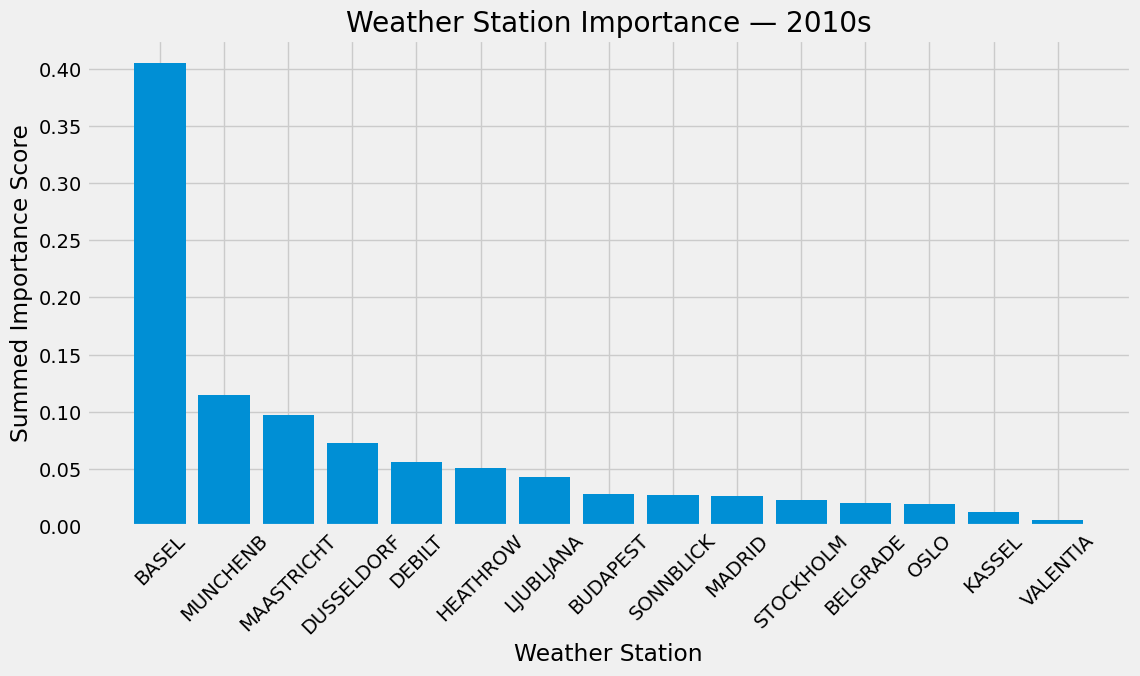

In [68]:
# Plotting

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 6))
plt.bar(df_importance['Weather Station'], df_importance['Importance'])
plt.xticks(rotation=45)
plt.xlabel('Weather Station')
plt.ylabel('Summed Importance Score')
plt.title('Weather Station Importance — 2010s')

In [70]:
# Get all columns that start with 'BASEL'
basel_columns = [col for col in climate_decade.columns if col.startswith('BASEL')]
print(basel_columns)

['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max']


## **Key Insights:**

### High accuracy
- The sharp, non‑uniform importance values show the model is learning real patterns rather than guessing, which aligns with strong overall accuracy.

### Feature coverage
- Importance is spread across many of the 9 features per station, meaning the model relies on a broad set of meteorological signals instead of a single dominant variable.

### Basel’s dominance
- One feature tied to Basel shows a clear spike (around 0.16), indicating Basel provides the most distinctive signal and heavily influences classification.

### Other key stations
- Several stations show mid‑level importance clusters, confirming the model uses multiple stations meaningfully and isn’t over‑fitting to Basel alone.

### Practical outcomes
- You can clearly explain which stations/features drive predictions.
- Low‑importance features can be simplified or re‑engineered.
- Basel can serve as a benchmark for comparison.
- The structured importance distribution confirms model stability.